In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
loan_data_raw = pd.read_csv("LoanApprovalPrediction.csv")

In [11]:
loan_data_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
loan_data_raw.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
print(loan_data_raw.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
loan_data_raw = loan_data_raw.dropna()

In [15]:
loan_data_raw.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.772277,5411.427723,1562.978059,144.566337,341.869307,0.859406
std,1.016542,6127.874416,2564.980770,81.306177,64.900341,0.347947
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3833.000000,1126.000000,128.000000,360.000000,1.000000
75%,2.000000,5818.000000,2253.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [17]:
loan_data_raw.drop(['Loan_ID'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


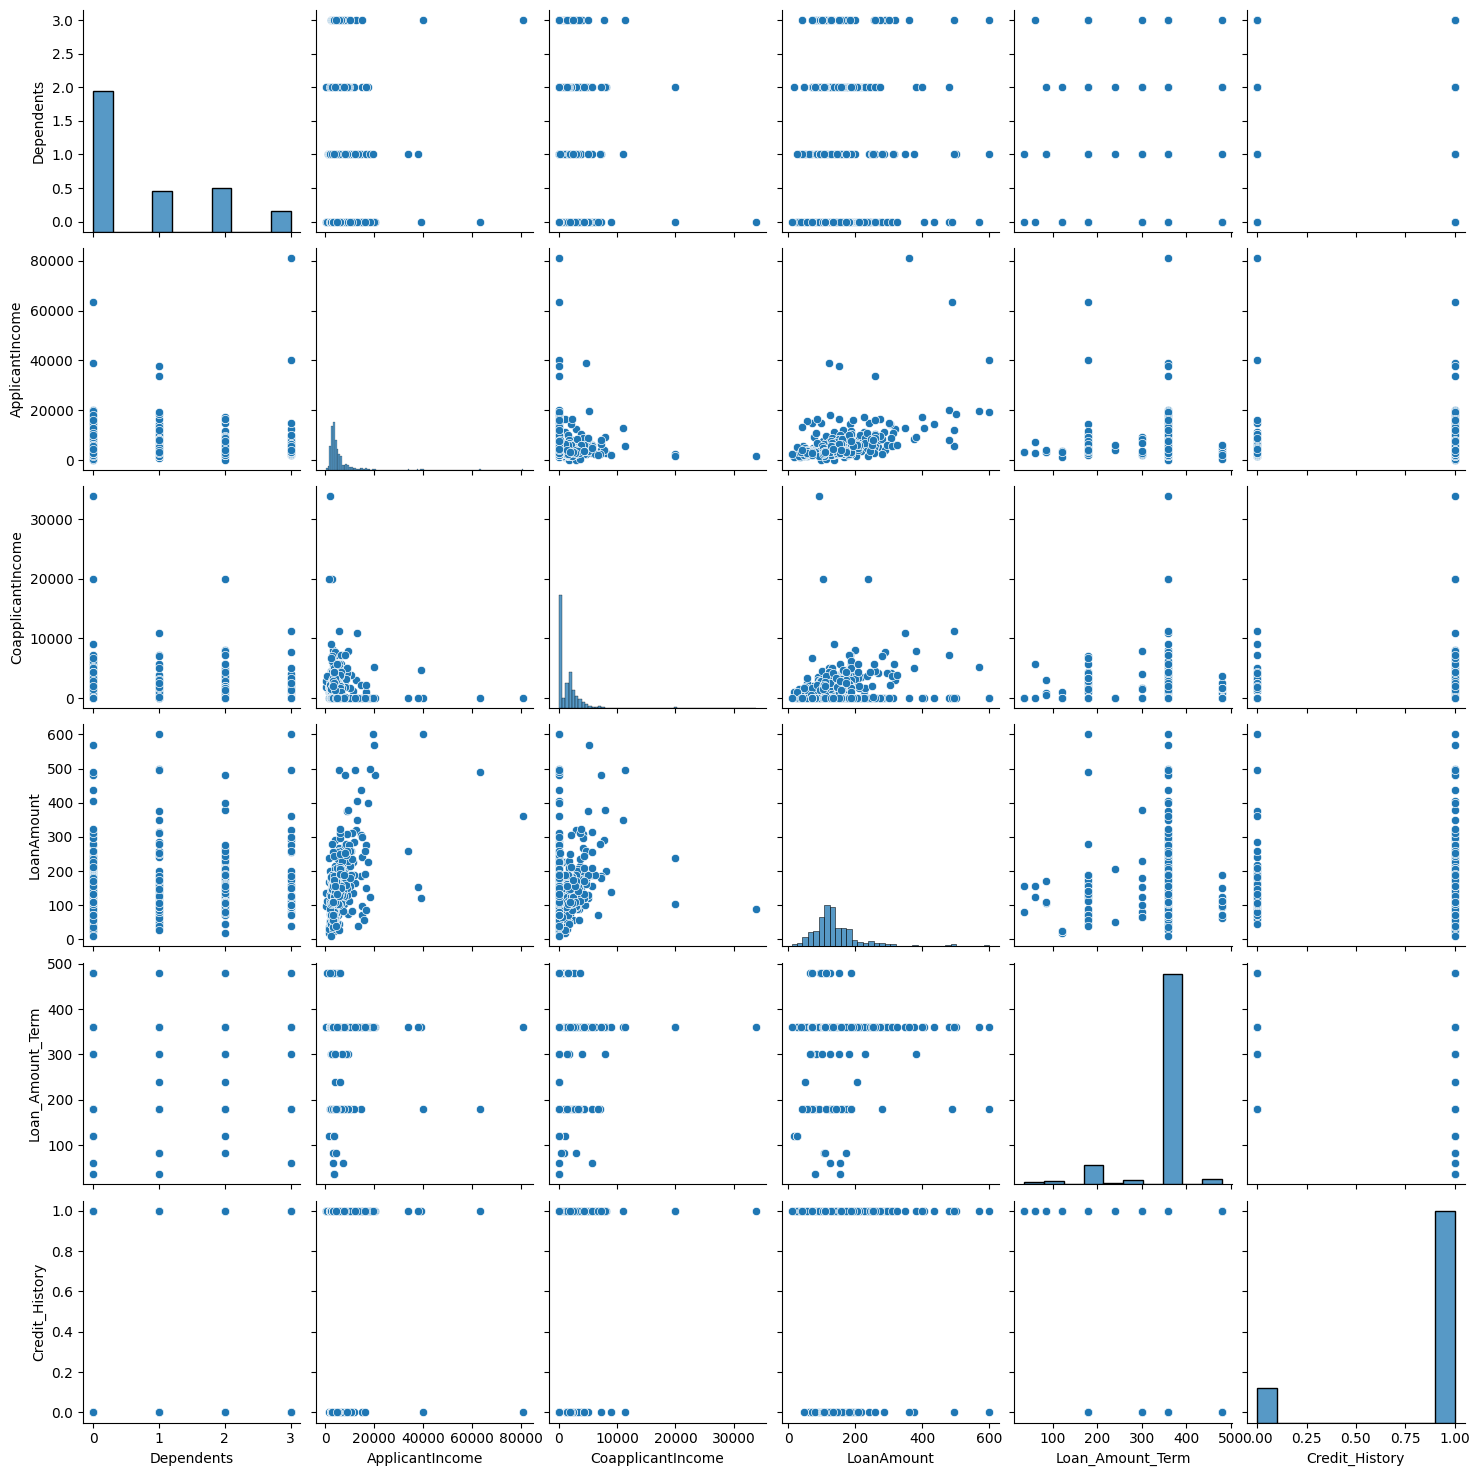

In [18]:
sns.pairplot(loan_data_raw)

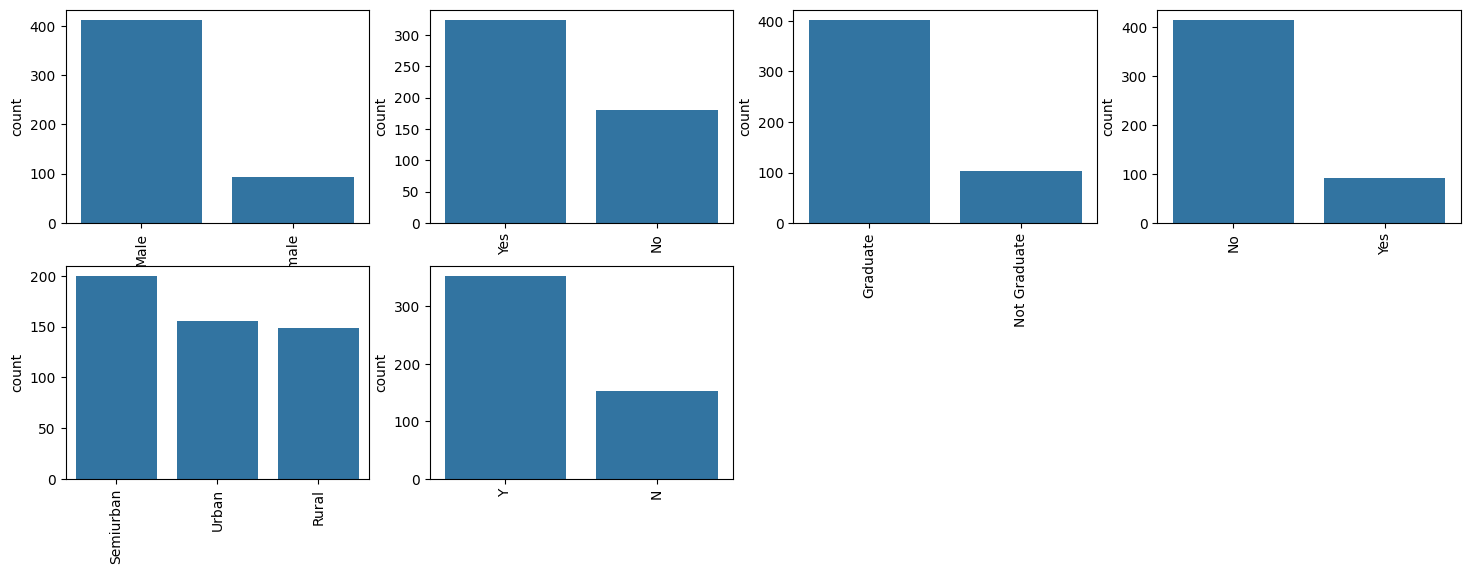

In [21]:
obj = (loan_data_raw.dtypes == "object")
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = loan_data_raw[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [22]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (loan_data_raw.dtypes == 'object')
for col in list(obj[obj].index):
    loan_data_raw[col] = label_encoder.fit_transform(loan_data_raw[col])

In [23]:
loan_data_raw.dtypes

Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [24]:
loan_data_raw.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1


<Axes: >

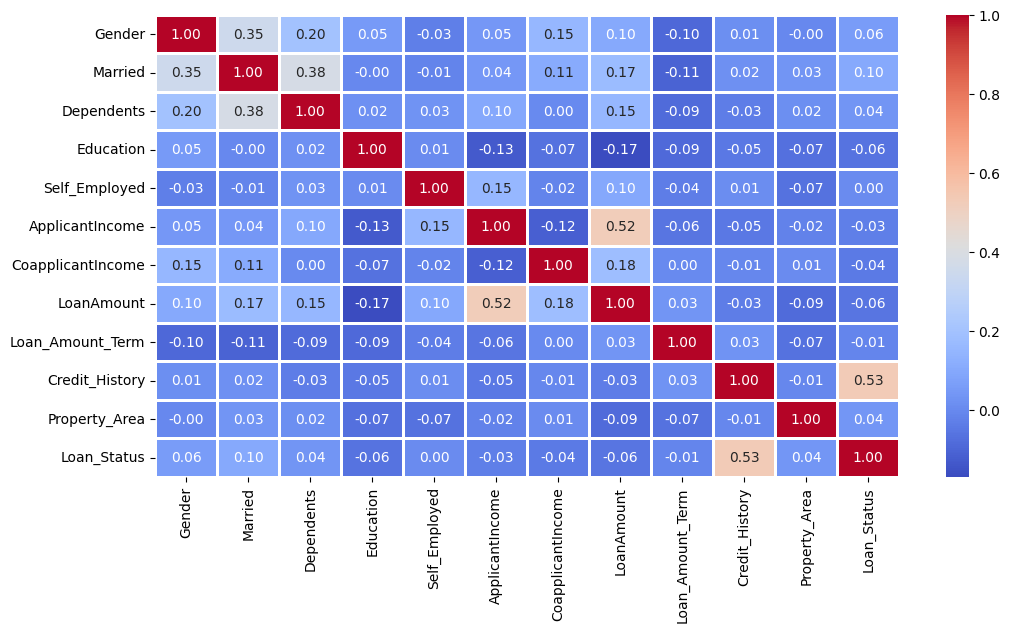

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(loan_data_raw.corr(), cmap="coolwarm", fmt=".2f",
            linewidths=2, annot=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


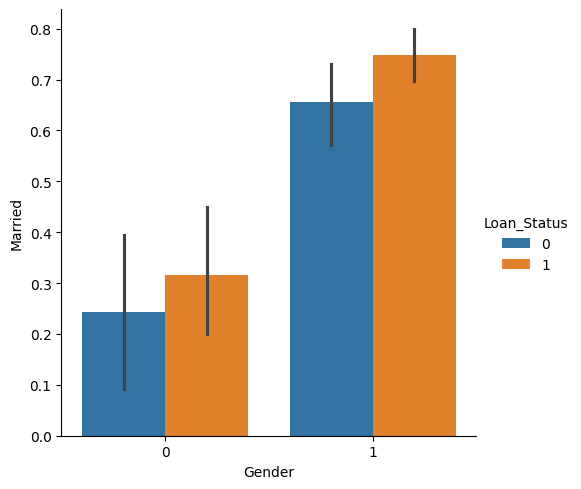

In [26]:
sns.catplot(x='Gender', y='Married',
            hue="Loan_Status",
            kind="bar",
            data=loan_data_raw)

In [27]:
from sklearn.model_selection import train_test_split

In [36]:
X_data = loan_data_raw.drop(["Loan_Status"], axis=1)
y_data = loan_data_raw["Loan_Status"]

X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data,
                                                    test_size=0.4,
                                                    random_state=42)

In [37]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((303, 11), (202, 11), (303,), (202,))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7,
                             criterion="entropy",
                             random_state=7)

svc = SVC()
lcr = LogisticRegression()


In [33]:
models = {
    "KNN": knn,
    "RFC": rfc,
    "SVC": svc,
    "LCR": lcr
}

In [40]:
def train_classifier(clf, X_train, Y_train):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train, y_pred)
    precision = metrics.precision_score(Y_train, y_pred)


    return accuracy, precision

In [43]:
train_classifier(svc, X_train, Y_train)

(0.7326732673267327, 0.7281879194630873)

In [44]:
def test_classifier(clf, X_train, Y_train):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    precision = metrics.precision_score(Y_test, y_pred)
    
    return accuracy, precision

In [47]:
test_classifier(svc, X_train, Y_train)

(0.6683168316831684, 0.6716417910447762)

In [48]:
train_accuracy = []
train_precision = []

test_accuracy = []
test_precision = []

for name, clf in models.items():
    current_tr_accuracy, current_tr_precision = train_classifier(clf, X_train, Y_train)
    current_ts_accuracy, current_ts_precision = test_classifier(clf, X_test, Y_test)
    
    print("For", name)
    print("Training Accuracy - ", current_tr_accuracy)
    print("Training Precision - ", current_tr_precision)
    print("Testing Accuracy - ", current_ts_accuracy)
    print("Testing Precision - ", current_ts_precision)
    
    train_accuracy.append(current_tr_accuracy)
    train_precision.append(current_tr_precision)
    test_accuracy.append(current_ts_accuracy)
    test_precision.append(current_ts_precision)

For KNN
Training Accuracy -  0.7887788778877888
Training Precision -  0.8047808764940239
Testing Accuracy -  0.7871287128712872
Testing Precision -  0.7961783439490446
For RFC
Training Accuracy -  0.9867986798679867
Training Precision -  0.9863013698630136
Testing Accuracy -  0.9752475247524752
Testing Precision -  0.9712230215827338
For SVC
Training Accuracy -  0.7326732673267327
Training Precision -  0.7281879194630873
Testing Accuracy -  0.6782178217821783
Testing Precision -  0.6766169154228856
For LCR
Training Accuracy -  0.8151815181518152
Training Precision -  0.8108108108108109
Testing Accuracy -  0.7524752475247525
Testing Precision -  0.7654320987654321


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [57]:
performance = pd.DataFrame({'Method': models.keys(),
                           'Training_Accuracy': train_accuracy,
                           'Training_Precision': train_precision,
                           'Testing_Accuracy': test_accuracy,
                           'Testing_Precision': test_precision}).sort_values('Testing_Precision', ascending=False)

In [58]:
performance 

,Method,Training_Accuracy,Training_Precision,Testing_Accuracy,Testing_Precision
1,RFC,0.986799,0.986301,0.975248,0.971223
0,KNN,0.788779,0.804781,0.787129,0.796178
3,LCR,0.815182,0.810811,0.752475,0.765432
2,SVC,0.732673,0.728188,0.678218,0.676617


In [73]:
performance_df1 = pd.melt(performance, id_vars = "Method")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


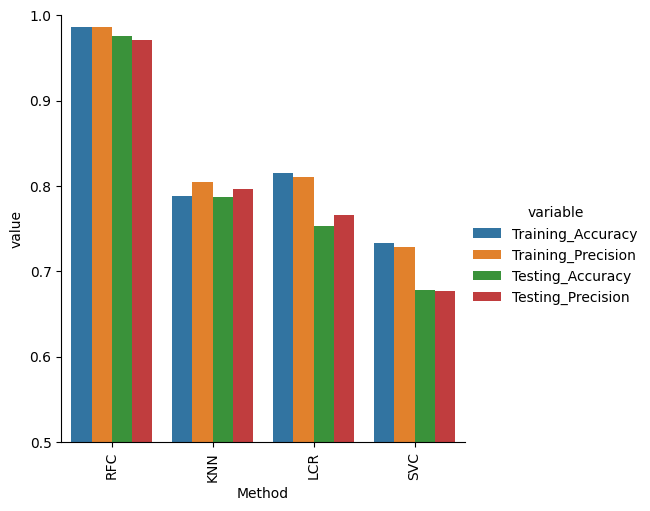

In [76]:
sns.catplot(x ="Method",y="value",
            hue="variable", data = performance_df1, kind="bar", height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation ="vertical")
plt.show()